# Social Network Analysis on Netflix dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Data Preperation:

1.1. Checking duplicates values in the dataset

In [4]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6229    False
6230    False
6231    False
6232    False
6233    False
Length: 6234, dtype: bool

1.2. Find the missing rows in each column

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

1.3. Remove the NaN values from the dataset

In [6]:
df = df.fillna(0)

1.4. Change the 'date_added' values to the only year. And rename the column: 'added_year'

In [7]:
df['date_added'] = pd.to_datetime(df.date_added)
df['date_added'] = df['date_added'].dt.strftime("%Y")

In [8]:
df['date_added']

0       2019
1       2016
2       2018
3       2018
4       2017
        ... 
6229    1970
6230    1970
6231    1970
6232    1970
6233    1970
Name: date_added, Length: 6234, dtype: object

In [9]:
df = df.rename(columns={"date_added": "added_year"})


In [10]:
df

,show_id,type,title,director,cast,country,added_year,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,0,Jandino Asporaat,United Kingdom,2016,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,0,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,0,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,0,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,1970,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,0,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,1970,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,0,0,0,1970,2016,0,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,0,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,1970,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


1.5. Make a copy of the dataset

In [11]:
df_copy = df.copy()

1.6. In the copied dataset,remove all the columns, except for the ‘show-id’, ‘type’ and ‘cast’.

In [12]:
df_copy.drop(['title', 'director','country','added_year','release_year','rating', 'duration','listed_in','description'], axis = 1, inplace=True) 


In [13]:
df_copy.head()

,show_id,type,cast
0,81145628,Movie,"Alan Marriott, Andrew Toth, Brian Dobson, Cole..."
1,80117401,Movie,Jandino Asporaat
2,70234439,TV Show,"Peter Cullen, Sumalee Montano, Frank Welker, J..."
3,80058654,TV Show,"Will Friedle, Darren Criss, Constance Zimmer, ..."
4,80125979,Movie,"Nesta Cooper, Kate Walsh, John Michael Higgins..."


1.7. In the copied dataset, you make sure that each artist will be in a row with the showid that they have participated in and the type

## Data Discovering:

2.1. Plot the number of movies as TV shows.

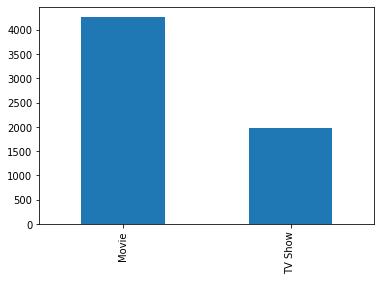

In [29]:
(df['type']).value_counts().sort_index().plot(kind='bar')

2.2. Plot the number of releases per year. Give an interpretation.

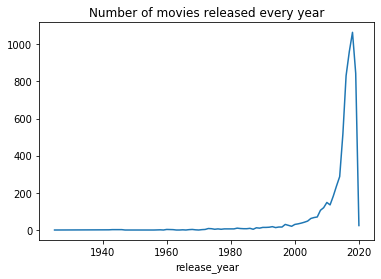

In [26]:
df.groupby('release_year').size().plot(title="Number of movies released every year")


2.3. What is the highest year in adding new shows?


2.4. What are the types of ratings for the movies? Plot for each rating the number of movies.


## Social Network Analysis:



3.1. Create a co-acting network, where the nodes are actors and the edges are the links between actors if they have participated in the same movie or TV-show at least once.

3.2. Compute the betweenness centrality, degree centrality , and close- ness centrality for each node.

3.3. For each centrality measure, find the actor with the highest value.


3.4. Compute the average length of the shortest path and the average clustering coefficient.

3.5. Shuffle your data and take the first 100 rows and plot two modes network